# Some animation and effects with KV

In [1]:
%load_ext pythonhere
%connect-there

In [2]:
%%there kv
#:import Animation kivy.animation.Animation
#:import ew kivy.uix.effectwidget

<Dancer@Button>:
    moves: ("\(-_- )\\", "/( -_-)/")
    font_size: 100
    seq: 0
    text: self.moves[int(self.seq)]
    on_press: self.seq = int(not(self.seq))

<Rotor@Image>:
    angle: 360
    allow_stretch: True
    source: "../app/data/logo/logo-128.png"

    canvas.before:
        PushMatrix
        Rotate:
            angle: self.angle
            origin: self.center
    canvas.after:
        PopMatrix

    rotate: Animation(angle=0, duration=2) + Animation(angle=360, duration=0)
    grow:
        (
        Animation(size=(300, 300), duration=.1) +
        Animation(size=(100, 100), duration=.1) +
        Animation(size=(100, 100), duration=.3)
        )

    on_parent:
        self.rotate.repeat=True
        self.grow.repeat=True
        self.rotate.start(self)
        self.grow.start(self)


<RootLayout@FloatLayout>:
    GridLayout:
        cols: 2
        Dancer:
        Dancer:
        Dancer:
        Dancer:
        
    EffectWidget:
        effects: ew.ScanlinesEffect(),
        AnchorLayout:  
            Rotor:
                size_hint: None, None    

RootLayout:

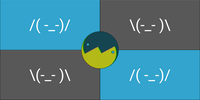

In [3]:
%there -d 1 screenshot -w 200